Exercício Aula 2





In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVR
df = pd.read_csv("house_prices.csv")
X= df.drop(columns=['SalePrice', 'Id'])
y= df['SalePrice']

## 1 - Seleção das Features

Muitas Features com pouca correlação.

<Axes: >

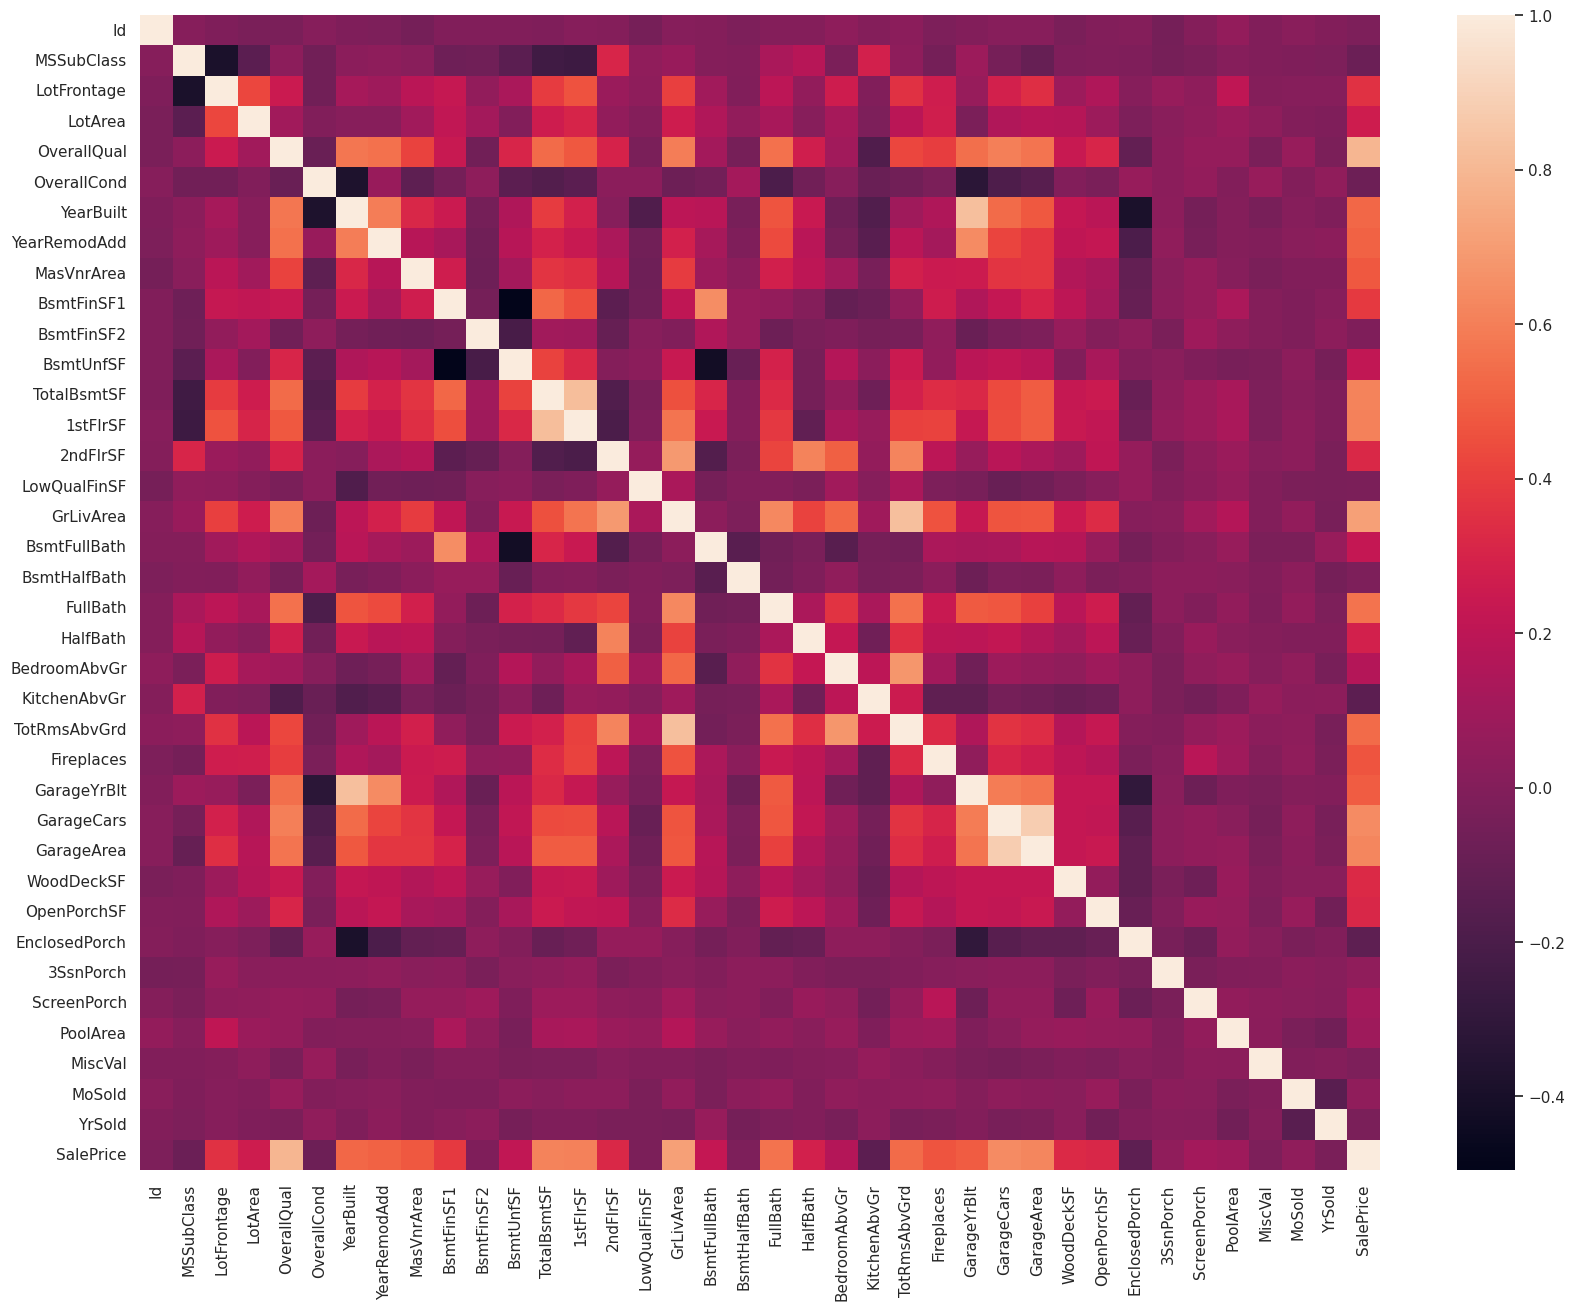

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df.corr(method = 'pearson', numeric_only = True))

## 2 - Distribuição do target

target mal distribuido

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

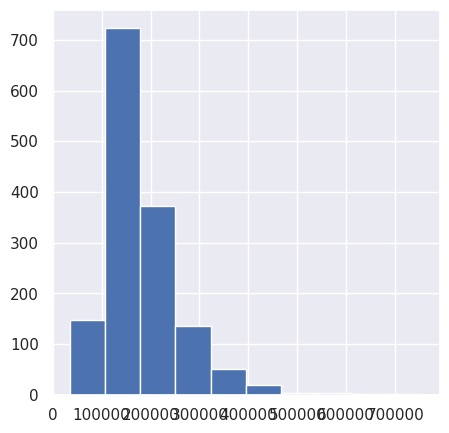

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
plt.hist(y)


## 3 - Outliers

Usar a média para preencher os valores, tendo os outliers, pode prejudicar o processo.



{'whiskers': [<matplotlib.lines.Line2D at 0x7e59e8e6cee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e59e8e6e440>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e59e9088670>],
 'medians': [<matplotlib.lines.Line2D at 0x7e59e8e6e290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e59e8e6f820>],
 'means': []}

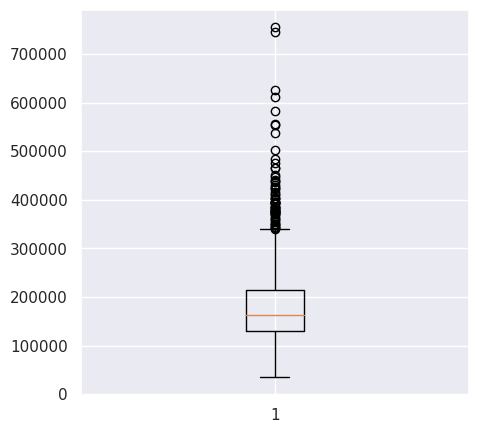

In [ ]:
plt.boxplot(y)

## 4 - Aplicação de transformadores

ao aplicar um transformador no nosso target, podemos alterar a representação o mesmo facilitando encontrar a decision boundary

note como aplicar o log muda a distribuição

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <BarContainer object of 10 artists>)

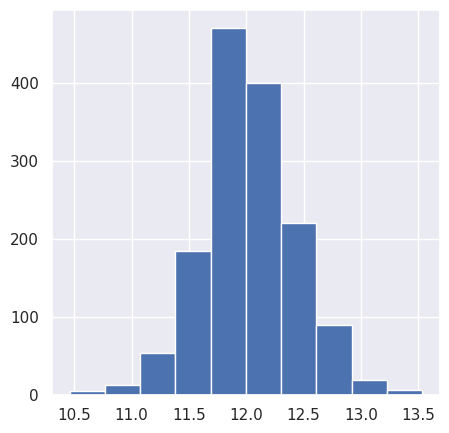

In [ ]:
plt.hist(np.log1p(y))

# Aplicando mudanças (sem hiperparametros)

<ipython-input-240-a82904b3d1ea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  colunas = df.corr().index[abs(df.corr()["SalePrice"])>0.6] #colunas numéricas com mais correlação


<Axes: >

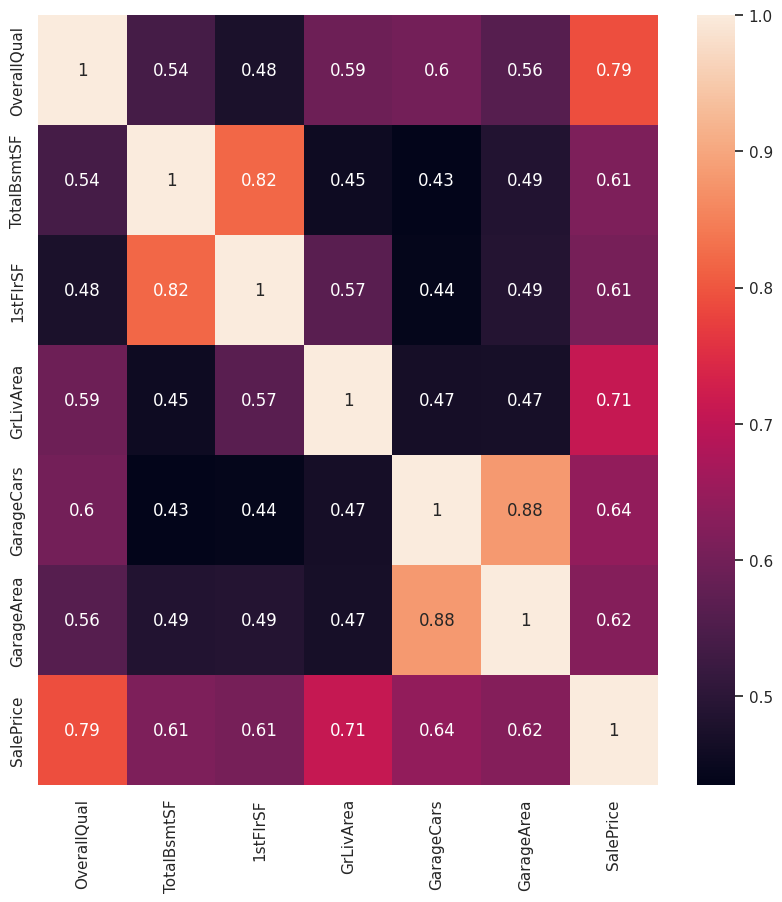

In [ ]:
# dropando colunas somente colunas numéricas com modo de correlação >0,6
df = pd.read_csv("house_prices.csv")
colunas = df.corr().index[abs(df.corr()["SalePrice"])>0.6] #colunas numéricas com mais correlação
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df[colunas].corr(),annot=True)

In [ ]:
# checando nulos
categorical_features = df[colunas].columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
df_num = df[numerical_features]
df_cat = df[categorical_features]

total = df_num.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total'])

In [ ]:
df_num = df_num.fillna(df_num.median()) #preenchendo os valores numéricos com a mediana, ao invés da média


In [ ]:
df.SalePrice = np.log1p(df.SalePrice ) # aplicando o log no target
y = df.SalePrice


In [ ]:
df_cat = pd.get_dummies(df_cat) #dummies
X = pd.concat([df_cat,df_num],axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 0)
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [ ]:
model=SVR()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
    # predições de treino

    print("\nMétricas de avaliação de treino")
    print(f"R2: { r2_score(y_train, y_train_pred):.2f}")
    print(f"MAE: { mean_absolute_error(y_train, y_train_pred):.2f}")
    print(f"RMSE: { np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

    # predições de teste


    print("\nMétricas de avaliação de teste")
    print(f"R2: { r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: { mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: { np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")



Métricas de avaliação de treino
R2: 0.97
MAE: 0.05
RMSE: 0.07

Métricas de avaliação de teste
R2: 0.87
MAE: 0.08
RMSE: 0.14
